### Day 15
#### part A

In [1]:
import numpy as np

In [2]:
inp=[0,5,4,1,10,14,7]

In [3]:
numbers=np.zeros((2020))
numbers[:]=np.nan

In [4]:
countinp=len(inp)
numbers[:countinp]=inp

for idx in range(countinp,len(numbers)):
    # check if nr was used before:
    nr=numbers[idx-1]
    previdxs=np.nonzero(numbers[:idx-1]==nr)[0]
    if len(previdxs)!=0:
        numbers[idx]=idx-1-previdxs[-1] # prev turn - turn before that
    else:
        numbers[idx]=0
    

In [5]:
numbers

array([  0.,   5.,   4., ...,  17., 121., 203.])

In [6]:
numbers[-1]

203.0

#### Part B
we change the way data is being stored: now we only record in which turn numbers were called the last time. we don't save the whole sequence of calls any more

In [57]:
maxround=30000000

In [58]:
lastturn=np.zeros((maxround),dtype=np.int)-1 # position of the last idx with that value. 
                            # lastturn[4]-1= value 4 was never used.
                            # lastturn[4]=2: value 4 was named in turn 2

In [59]:
# initialize
prevval=None
prevturn=None
for idx,val in enumerate(inp): # (all nrs are unique)
    if idx==0: 
        prevval=val
        prevturn=idx
        continue
    # always write one loop later
    lastturn[prevval]=prevturn
    prevval=val
    prevturn=idx
# now the 7 is stored in prevval but not written yet with the value prevturn=6

In [60]:
# play the game
for idx in range(len(inp),maxround):
    # check if the prevval has been used before (important: the turn count has not been updated yet with the last turn)
    if idx%1000000==0:
        print(idx,prevval)
    if lastturn[prevval]==-1: # was not used before
        newval=0 
    else:
        newval=idx-1-lastturn[prevval]
    
    # store the old prevval
    lastturn[prevval]=prevturn
    
    # create the new prevval
    prevval=newval
    prevturn=idx


1000000 55107
2000000 0
3000000 767
4000000 95256
5000000 18061
6000000 49
7000000 0
8000000 6911781
9000000 7
10000000 110
11000000 9407172
12000000 2627
13000000 32841
14000000 75090
15000000 24
16000000 47
17000000 1066391
18000000 6
19000000 12298
20000000 205
21000000 0
22000000 14472920
23000000 2613
24000000 1171
25000000 8
26000000 60
27000000 1692
28000000 235025
29000000 0


In [61]:
# the next value that will be written is the solution
prevval

9007186

In [62]:
import matplotlib.pyplot as plt

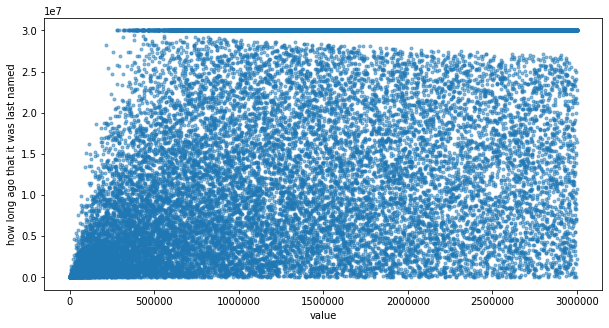

In [83]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0,3000000,100),30000000-lastturn[0:3000000:100],".",alpha=0.5)
plt.xlabel("value")
plt.ylabel("how long ago that it was last named");

In [84]:
np.nonzero(lastturn==-1)[0]

array([  130221,   142371,   169955, ..., 29999997, 29999998, 29999999],
      dtype=int64)